# Geometría Vectorial con NumPy

Podemos realizar algunas operaciones básicas de Álgebra Lineal con numPy: https://numpy.org/doc/stable/reference/routines.linalg.html

Como puede observarse en la documentación, en varias de ellas necesitaremos el submódulo `.linalg`.

In [28]:
import matplotlib.pyplot as plt
import numpy as np

## Operaciones entre vectores

La suma y resta es directa usando arreglos de NumPy.

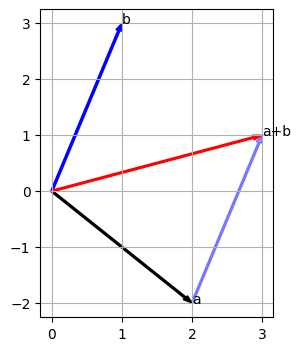

In [29]:
# Ejemplo: sumar dos vectores de R2, visualizar vectores

def dibuja_vec(miVec, miWidth=0.03, miCol='k', etiq=''):
  '''
  Dibujar un vector (flecha) desde el origen hacia miVec en el plano.
  '''
  plt.arrow(0,0,miVec[0],miVec[1],width=miWidth,facecolor=miCol,edgecolor=miCol,length_includes_head=True)
  plt.annotate(etiq,miVec)

a = np.array([2,-2])
b = np.array([1,3])

plt.figure(figsize=(3,4))
plt.arrow(a[0],a[1],b[0],b[1],width=0.03,facecolor='b',edgecolor='b',length_includes_head=True,alpha=0.4)
dibuja_vec(a,etiq='a')
dibuja_vec(b, miCol='b', etiq='b')
dibuja_vec(a+b, miCol='r', etiq='a+b')
#plt.xlim([0,4])
#plt.ylim([0,4])
plt.grid()
plt.show()

## Productos entre vectores

**Comandos:** `vdot`, `inner`, `outer`

Tenemos también disponible el **producto punto (escalar)**: $$u \cdot v = \sum_{k=1}^n u_k v_k$$

También está el llamado **producto exterior** entre dos vectores $u,v$ de tamaños $n,m$ donde el resultado es una matriz de $n\times m$ tal que la entrada $(i,j)$ es $u_i v_k$.

In [30]:
a = np.array([1,2,3])
b = np.array([-1,3,7])

print( f"Producto escalar (vdot): {np.vdot(a,b)}" ) # producto punto o escalar
print( f"Producto escalar (inner): {np.inner(a,b)}" ) # producto punto o escalar
print( f"Producto exterior (outer):\n {np.outer(a,b)}" ) # producto exterior: a_i * b_j

Producto escalar (vdot): 26
Producto escalar (inner): 26
Producto exterior (outer):
 [[-1  3  7]
 [-2  6 14]
 [-3  9 21]]


## Norma de vectores

**Comando:** `norm`

Es posible también calcular la **normal (Euclideana)** de vectores en $\mathbb{R}^n$.

In [31]:
a = np.array([1,2,3])

np.linalg.norm( a ) # necesitamos .linalg

3.7416573867739413

## Aplicación: Normalización de vectores en $\mathbb{R}^n$

Usando el comando anterior podemos calcular un vector unitario que preserve la dirección:

$$v_{nor} = \frac{v}{||v||}$$

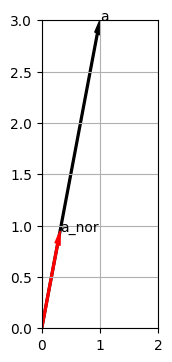

In [32]:
# Ejemplo: normalizar el siguiente vector y visualizarlo

a = np.array( [1,3] )
a_nor = a / np.linalg.norm( a )

plt.figure(figsize=(1.5,4))
plt.xlim([0,2])
plt.ylim([0,3])

dibuja_vec(a,etiq='a')
dibuja_vec(a_nor,miCol='r',etiq='a_nor')
plt.grid()
plt.show()

In [33]:
def norm_vec(miVec):
  '''
  Calcula vector unitario con misma dirección que miVec.
  '''
  if not np.isclose(np.linalg.norm( miVec ), 0):
    return miVec / np.linalg.norm( miVec )
  else:
    return None



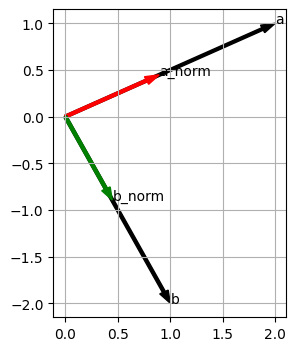

In [34]:
plt.figure(figsize=(3,4))
#plt.xlim([0,4])
#plt.ylim([0,4])
plt.grid()

a = np.array( [2,1] )
b = np.array( [1,-2] )
dibuja_vec(a,etiq="a")
dibuja_vec(norm_vec(a),miCol='r',etiq="a_norm")
dibuja_vec(b,etiq="b")
dibuja_vec(norm_vec(b),miCol='g',etiq="b_norm")
plt.show()

## Ángulo entre vectores

Con la norma también podemos calcular el ángulo entre vectores:
$$u\cdot y = |u|\ |v|\ \cos \alpha$$

ángulo entre a y b: 116.565
ángulo entre a y c: 90.000


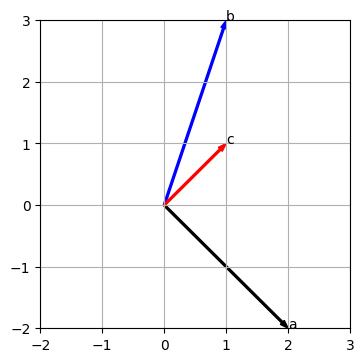

In [35]:
a = np.array([2,-2])
b = np.array([1,3])
c = np.array([1,1])

def angEntreVecs(u,v):
  '''
  Regresa ángulo entre vectores u,v en grados
  '''
  return np.arccos( np.vdot(u,v) / ( np.linalg.norm(u)*np.linalg.norm(v) ) ) * 180 / np.pi

print( f"ángulo entre a y b: {angEntreVecs(a,b):.3f}")
print( f"ángulo entre a y c: {angEntreVecs(a,c):.3f}" )

plt.figure(figsize=(4,4))
dibuja_vec(a,etiq="a")
dibuja_vec(b,miCol='b',etiq="b")
dibuja_vec(c,miCol='r',etiq="c")
plt.xlim([-2,3])
plt.ylim([-2,3])
plt.grid()
plt.show()

## Producto cruz

**Comando:** `cross`

$\mathbf{a} \times \mathbf{b}$

In [36]:
avec = np.array([1,1,0])
bvec = np.array([1,0,1])
axbvec  = np.cross(avec,bvec)
print(axbvec)

[ 1 -1 -1]


In [37]:
np.dot(avec,axbvec)

0

## Álgebra Lineal con NumPy

### Operaciones entre matrices

**Operador:** `@`

**Comandos:** `matmul, matrix_power`

Para la suma de matrices podemos usar `+` y análogamente para la resta. La multiplicación por escalares se puede realizar con `*`. Para la multiplicación y la potencia de matrices podemos usar los siguientes:

In [38]:
A = np.array([[1,2],[-2,3]])
B = np.array([[1,1,1],[1,0,3]])

print( A.shape[1] == B.shape[0] ) # revisar que podamos multiplicar matrices

C = A @ B
print( C )

D = np.matmul(A,B) # es equivalente a usar @
print( np.array_equal(C,D) ) # comprobar igualdad de resultados

True
[[ 3  1  7]
 [ 1 -2  7]]
True


### Aplicación: Exploración de potencias de matrices

Sea $\displaystyle A = \begin{pmatrix}0 & -1 \\ 1 & 2\end{pmatrix}$. ¿Qué matriz resulta de $A^n$ con $n$ entero positivo?

In [39]:
A = np.array([ [0,-1],[1,2] ])

for n in range(5):
  print( "n="+str(n+1)+":\n",np.linalg.matrix_power(A,n+1),"\n" )

n=1:
 [[ 0 -1]
 [ 1  2]] 

n=2:
 [[-1 -2]
 [ 2  3]] 

n=3:
 [[-2 -3]
 [ 3  4]] 

n=4:
 [[-3 -4]
 [ 4  5]] 

n=5:
 [[-4 -5]
 [ 5  6]] 



**Conjetura**. $\displaystyle A = \begin{pmatrix}-(n-1) & -n \\ n & n+1\end{pmatrix}$

## Generación de matrices especiales

**Comandos:** `eye`, `identity`, `ones`, `zeros`, `full`

Con `eye` generamos una matriz con 1 en la diagonal principal y 0 fuera de ella. Con `identity` generamos matriz identidad de tamaño $n\times n$. Con `ones` y `zeros` generamos una matriz totalmente compuesto por unos o ceros, respectivamente. Y con `full` generamos una matriz totalmente compuesto por un valor dado.

In [40]:
I3  = np.identity(3)
I32 = np.eye(3,2)
U2  = np.ones([2,2])
F7  = np.full([2,5], fill_value=7)

print(I3, "\n\n", I32,"\n\n", U2,"\n\n", F7)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

 [[1. 0.]
 [0. 1.]
 [0. 0.]] 

 [[1. 1.]
 [1. 1.]] 

 [[7 7 7 7 7]
 [7 7 7 7 7]]


## Inversas y solución de sistemas lineales

**Comandos:** `solve`, `inv`

Si $A$ es una matriz cuadrada de rango máximo, podemos resolver el sistema de ecuaciones lineales $Ax=b$ para obtener su solución única usando el comando `solve`.

**Ejemplo.** Resolver el sistema

$x+y=4,$

$2x-y=-1$.

In [41]:
A = np.array([[1,1],[2,-1]])  # matriz de coeficientes A
b = np.array([4,-1])          # vector b

x = np.linalg.solve(A,b)      # resolvemos Ax=b para x
print("x =", x)               # imprimimos resultado

print( "Ax =", A @ x )        # comprobación

print( np.allclose(b,A@x) )   # preguntamos si b es prácticamente Ax

x = [1. 3.]
Ax = [ 4. -1.]
True


Para la inversa usamos el comando `inv`.

In [42]:
A_inv = np.linalg.inv(A) # obtenemos inversa de A
#print(A_inv)
print(np.around(A_inv,3))

print(np.around(A @ A_inv,3)) # comprobamos

print(np.allclose(A @ A_inv, np.eye(2))) # preguntamos si se parece a la identidad

[[ 0.333  0.333]
 [ 0.667 -0.333]]
[[1. 0.]
 [0. 1.]]
True


## Transpuesta, determinante, rango

**Atributo:** `.T`
**Comandos:** `transpose`, `det`, `matrix_rank`

Podemos realizar la transposición de matrices usando `.T` o `transpose`.

In [43]:
A = np.array([ [-3, 5,4],  [2, 1,4]])
print(A.T)
print(np.transpose(A)) # deteminar transpuesta de A

[[-3  2]
 [ 5  1]
 [ 4  4]]
[[-3  2]
 [ 5  1]
 [ 4  4]]


Para hallar el determinante podemos usar `det`.

In [44]:
A = np.array([ [-3, 5],  [2, 1]])

np.linalg.det(A) # calcular determinante de A

-13.0

Finalmente, también es posible hallar el rango de una matriz usando `matrix_rank`.

In [45]:
v1 = np.array([1,2,3,4])
v2 = np.array([3,2,0,1])
v3 = v1+v2

A = np.array([v1, v2, v3]).T # construimos matriz con ciertos vectores columna
print(A)

print( np.linalg.matrix_rank(A) ) # esperamos rango igual a 2

[[1 3 4]
 [2 2 4]
 [3 0 3]
 [4 1 5]]
2


### Aplicaciones: Generar matrices simétricas y antisimétricas

Algunos resultados de álgebra lineal tratan sobre generar matrices simétricas o antisimétricas dada una matriz $A$.

In [46]:
A = np.array([[1, 3, -7, 1], [0, 2, 4, 3], [0, 0, -5, 2]])
B = A @ A.T
print(B)

[[ 60 -19  37]
 [-19  29 -14]
 [ 37 -14  29]]


In [47]:
A = np.array([[1, 3, -7], [0, 2, 4], [0, 0, -5]])
B = A + A.T
C = A - A.T
print(f"B:\n {B}")
print(f"C:\n {C}")


B:
 [[  2   3  -7]
 [  3   4   4]
 [ -7   4 -10]]
C:
 [[ 0  3 -7]
 [-3  0  4]
 [ 7 -4  0]]


## Eigenvalores y eigenvectores

**Comandos:** `eigvals`, `eig`

Es posible determinar valores y vectores propios de una matriz.

In [48]:
v1 = np.array([1,2,3])
v2 = np.array([3,2,0])
v3 = v1+v2

A = np.array([v1, v2, v3]).T # construimos matriz con ciertos vectores columna
print(A)
np.linalg.eigvals(A)

[[1 3 4]
 [2 2 4]
 [3 0 3]]


array([ 7.00000000e+00, -1.00000000e+00,  8.89402517e-16])

Observamos un eigenvalor prácticamente igual a cero.

In [49]:
vals, vecs = np.linalg.eig(A)

for n in range(3):
  print(f"Eigen par {n}: {vals[n]}, {vecs[:,n]}")

print( f"Comprobacion: A*v=  {A @ vecs[:,0]}, lam*v= {vals[0] * vecs[:,0]}" )

Eigen par 0: 6.999999999999998, [0.62469505 0.62469505 0.46852129]
Eigen par 1: -1.0000000000000022, [ 0.77298795  0.25766265 -0.57974096]
Eigen par 2: 8.89402516638082e-16, [-0.57735027 -0.57735027  0.57735027]
Comprobacion: A*v=  [4.37286533 4.37286533 3.279649  ], lam*v= [4.37286533 4.37286533 3.279649  ]


## Aplicación: Diagonalización de matrices

$D = P^{-1} A P$

In [50]:
print(np.linalg.matrix_rank(vecs))
print(np.linalg.inv(vecs) @ A @ vecs )

3
[[ 7.00000000e+00  1.77635684e-15 -8.88178420e-16]
 [-2.50878294e-15 -1.00000000e+00 -2.87998490e-16]
 [-8.49599761e-16  2.13832098e-15  0.00000000e+00]]


## Cálculo diferencial con NumPy

**Comando:** `diff`



# SciPy: Extensión de funciones de NumPy

**SciPy** es una paquetería que complementa varias funcionalidades de NumPy. En particular para Álgebra Lineal se puede consultar la siguiente documentación: https://docs.scipy.org/doc/scipy/reference/linalg.html

* Revisar simetría: `issymmetric`
* Descomposición LU: `lu`, `lu_factor`
* Valores singulares: `svdvals`
* Base del espacio nulo: `null_space`
* Raíz cuadrada de matriz: `sqrtm`


## Cálculo Integral con SciPy

Dentro de SciPy podemos encontrar funcionalidades relacionadas con Cálculo Integral: https://docs.scipy.org/doc/scipy/reference/integrate.html

**Comandos:** `quad`

Utiliza técnicas de una librería de Fortran QUADPACK para aproximar integrales definidas $\int_{a}^{b} f(x) dx$.

In [51]:
import scipy

def f(x):
  return 6*x**2-2*x+2

scipy.integrate.quad(f, 0, 1)

(3.0, 3.3306690738754696e-14)

## Aplicación: Exploración de sumas de Riemann

Suma de Riemann: 	0.6510935577155598. 
Aprox. con quad: 	(0.6508801680230076, 7.226221488110336e-15). 
Valor real: 	0.6508801680230076


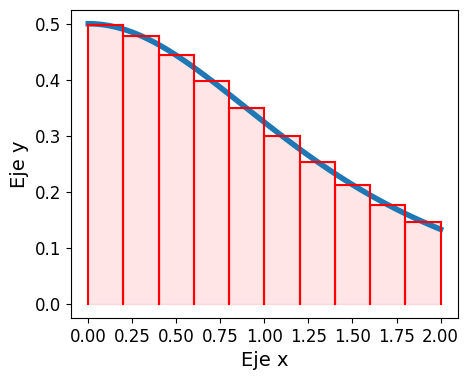

In [52]:
def func(x):
  ''' Función a integrar. '''
  return np.exp(x)/(1+np.exp(2*x))

# intervalo [a,b], y=f(x)
a=0
b=2
xx=np.linspace(a,b,100)
yy=func(xx)

# creación de figura para gráficas
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(xx,yy,linewidth=4)

n = 10       # número de rectángulos
dx = (b-a)/n # delta x
x0=a         # extremo izquierdo
x1=x0+dx     # extremo derecho
ci=0         # punto en [x0,x1]
area=0       # area

for ii in range(n):
  ''' Se dejan algunas opciones para elegir a ci. '''
  #ci=x1            # por derecha
  #ci=x0            # por izquierda
  ci=x0 + (x1-x0)/2 #punto intermedio

  fi=func(ci)
  plt.plot([x0,x1],[fi,fi],'r')
  plt.plot([x0,x0],[0,fi],'r')
  plt.plot([x1,x1],[0,fi],'r')
  plt.fill_between([x0,x1],[fi,fi],alpha=0.1,color='r')
  area+=(x1-x0)*fi
  x0=x1
  x1=x0+dx

plt.xlabel("Eje x",size=14)
plt.ylabel("Eje y",size=14)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"Suma de Riemann: \t{area}. \nAprox. con quad: \t{scipy.integrate.quad(func, a, b)}. \nValor real: \t{np.arctan(np.exp(2))-np.arctan(1)}")

Puede consultar otras funcionalidades de `scipy.integrate` en el siguiente recurso: https://docs.scipy.org/doc/scipy/reference/integrate.html

## Extra: Ecuaciones diferenciales

In [53]:
def elemLin(x0,y0,m,dx):
  theta = np.arctan(m)
  xx = np.linspace(x0-dx*np.cos(theta),x0+dx*np.cos(theta))
  yy = m*(xx-x0) + y0

  return xx, yy

## Ejemplo*
$\frac{dy}{dx} = \sin(x+y)$

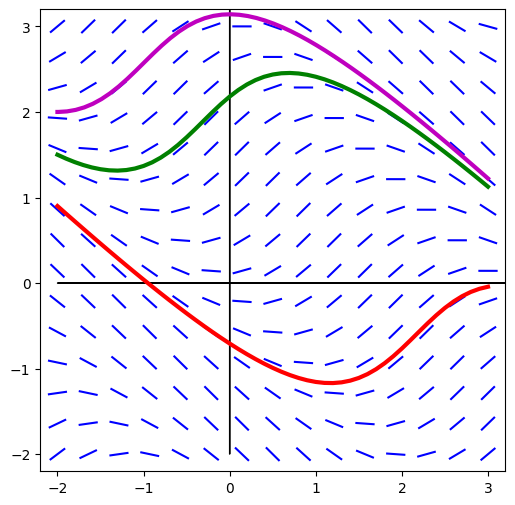

In [54]:
#@title
def f(x,y):
  return np.sin(x+y)

a=-2
b= 3

plt.figure(figsize=(6,6))

plt.arrow(a,0,2*b,0,head_width=0.2, head_length=0.2)
plt.arrow(0,a,0,2*b,head_width=0.2, head_length=0.2)

xmesh = np.linspace(a,b,15)
ymesh = np.linspace(a,b,15)

for x in xmesh:
  for y in ymesh:
    m=f(x,y)
    xx, yy = elemLin(x, y, m, 0.1)
    plt.plot(xx, yy, c='b')

plt.xlim([a-0.2,b+0.2])
plt.ylim([a-0.2,b+0.2])

sol = scipy.integrate.solve_ivp(f, t_span=[a,b], y0=[0.9], max_step=0.1)
plt.plot(sol.t, sol.y[0,:], c='r', linewidth=3)
sol = scipy.integrate.solve_ivp(f, t_span=[a,b], y0=[1.5], max_step=0.1)
plt.plot(sol.t, sol.y[0,:], c='g', linewidth=3)
sol = scipy.integrate.solve_ivp(f, t_span=[a,b], y0=[2], max_step=0.1)
plt.plot(sol.t, sol.y[0,:], c='m', linewidth=3)

También se cuenta con el comando `solve_ivp`.

## Problemas de optimización con SciPy

Algunos problemas de Cálculo Diferencial son de optimización.

**Comandos:** `fsolve`, `minimize_scalar`

Con `fsolve` se pueden encontrar aproximaciones de raíces cerca de una aproximación inicial. Con `minimize_scalar` se buscará un mínimo de la función.

Encontrar valores críticos de $f(x)=2x^3-4x+10$.

Tenemos que $f'(x)=6x^2-4$ y $f''(x)=12x$.

In [55]:
def df(x):
  return 6*x**2 - 4

#sol = scipy.optimize.fsolve(df,0)
#sol = scipy.optimize.fsolve(df,1)
sol = scipy.optimize.fsolve(df,-1)

print(sol)

[-0.81649658]


In [56]:
def f(x):
  return 2*x**3-4*x+10

sol=scipy.optimize.minimize_scalar(f)
print(sol)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 7.822675784192731
       x: 0.8164965820792619
     nit: 11
    nfev: 14


En `optimize` hay otras funciones como mínimos cuadrados, ajuste de curvas. Más sobre `optmize`: https://docs.scipy.org/doc/scipy/reference/optimize.html

## SymPy

**SymPy** es una paquetería que nos permite hacer cálculo simbólico. Se puede consultar un tutorial en la siguiente referencia: https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

* Símbolos
* Funciones
* Derivadas: `diff`, `Derivative`
* Integrales: `integrate`, `Integral`

In [57]:
import sympy

In [58]:
x = sympy.symbols('x')

In [59]:
x+x

2*x

In [60]:
str(x+x)

'2*x'

## Álgebra simbólica

In [61]:
expr = (x**2+1)**2 - 2*x*(x**3-1)

In [62]:
sympy.expand(expr)

-x**4 + 2*x**2 + 2*x + 1

In [63]:
str(sympy.expand(expr))

'-x**4 + 2*x**2 + 2*x + 1'

## Cálculo diferencial con SymPy

In [64]:
dexpr = sympy.diff(expr)
dexpr

-8*x**3 + 4*x*(x**2 + 1) + 2

In [65]:
sympy.expand(dexpr)

-4*x**3 + 4*x + 2

In [66]:
d3expr = sympy.diff(sympy.expand(expr), x, 3)
d3expr

-24*x

In [67]:
y = sympy.symbols('y')

exp2d = sympy.cos(x+y**2)

sympy.diff(exp2d,x)

-sin(x + y**2)

In [68]:
sympy.diff(exp2d,y)

-2*y*sin(x + y**2)

In [69]:
sympy.limit(expr, x, 1)

4

In [70]:
from sympy import oo
sympy.limit( (x+3)/(2*x-3), x, oo )

1/2

## Cálculo integral con SymPy

In [71]:
inexpr = sympy.integrate(expr)
inexpr

-x**5/5 + 2*x**3/3 + x**2 + x

In [72]:
sympy.integrate( sympy.exp(-x), (x, 1, oo))

exp(-1)

Más sobre aplicaciones de Cálculo con SymPy: https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

# ¿Ideas?

¿Qué problemas podrías abordar con las herramientas vistas en el curso?
- Gráficas
- Cálculo simbólico
- Optimización y raíces
- Cálculo científico

Explora con Python tus ideas. Gracias.

# Algunas referencias

- https://do1.dr-chuck.com/pythonlearn/ES_es/pythonlearn.pdf ("Python para todos" de Charles R. Severance)
- https://www2.eii.uva.es/fund_inf/python/notebooks/00_Introduccion/Introduccion.html ("Fundamentos de Programación en Python" de Trespaderne, F. M., & Echevarría, R. M.)
- https://libcon.rec.uabc.mx:6278/read/9786075380889/index ("PYTHON CON APLICACIONES A LAS MATEMÁTICAS, INGENIERÍA Y FINANZAS" de BÁEZ LÓPEZ, David; CERVANTES VILLAGÓMEZ, Ofelia; ARÍZAGA SILVA, Juan Antonio ; CASTILLO JUÁREZ, Esteban)
- Linge, S., & Langtangen, H. P. (2020). Programming for computations-Python: A gentle introduction to numerical simulations with Python 3.6 (p. 332). Springer Nature.
- Turner, P. R., Arildsen, T., & Kavanagh, K. (2018). Applied scientific computing: with Python. Springer.
- Sundnes, J. (2020). Introduction to scientific programming with Python (p. 148). Springer Nature.
- Erik Christensen, Francisco Javier Blanco-Silva, Sergio J Rojas G, & Sergio J Rojas G (USD). (2015). Learning SciPy for Numerical and Scientific Computing : Quick Solutions to Complex Numerical Problems in Physics, Applied Mathematics, and Science with SciPy: Vol. Second edition. Packt Publishing.